In [6]:
from __future__ import division
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy
import seaborn
seaborn.set_context({"figure.figsize": (15, 10)})

Scer FF 15 / 76 0.1974
Scer RR 18 / 76 0.2368
Scer FR 5 / 76 0.0658
Scer RF 38 / 76 0.5000


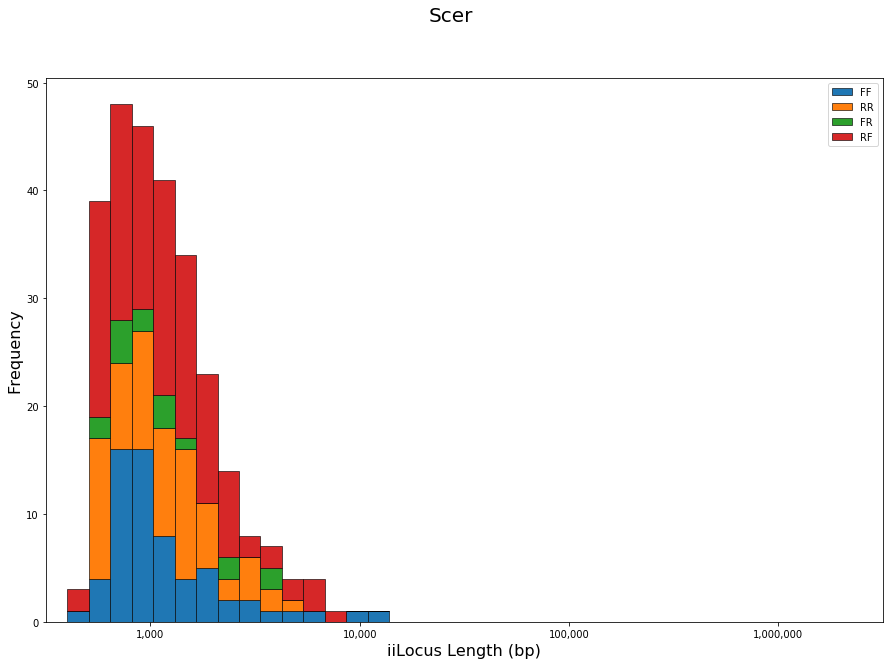

Cele FF 304 / 1080 0.2815
Cele RR 303 / 1080 0.2806
Cele FR 193 / 1080 0.1787
Cele RF 280 / 1080 0.2593


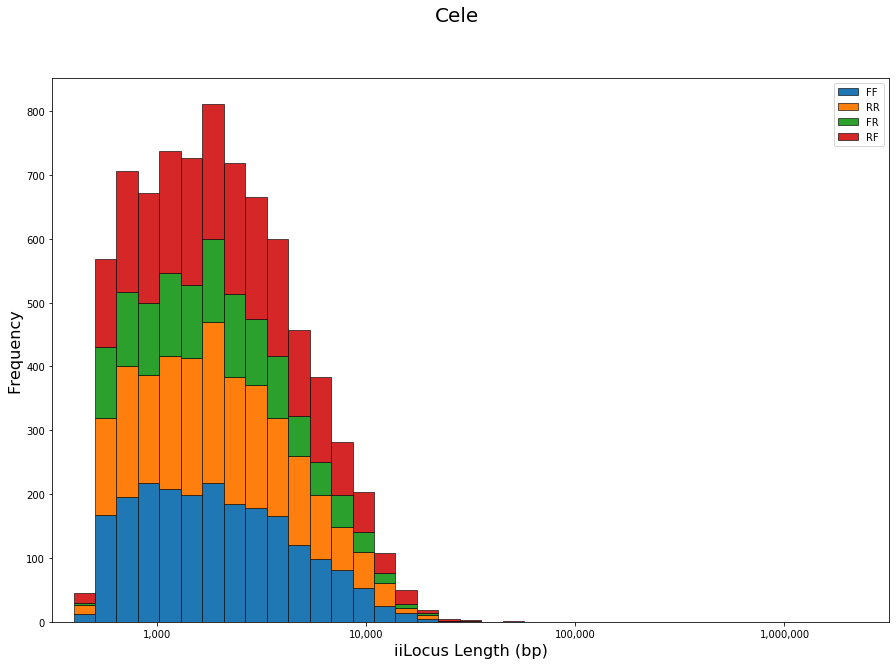

Crei FF 131 / 597 0.2194
Crei RR 137 / 597 0.2295
Crei FR 210 / 597 0.3518
Crei RF 119 / 597 0.1993


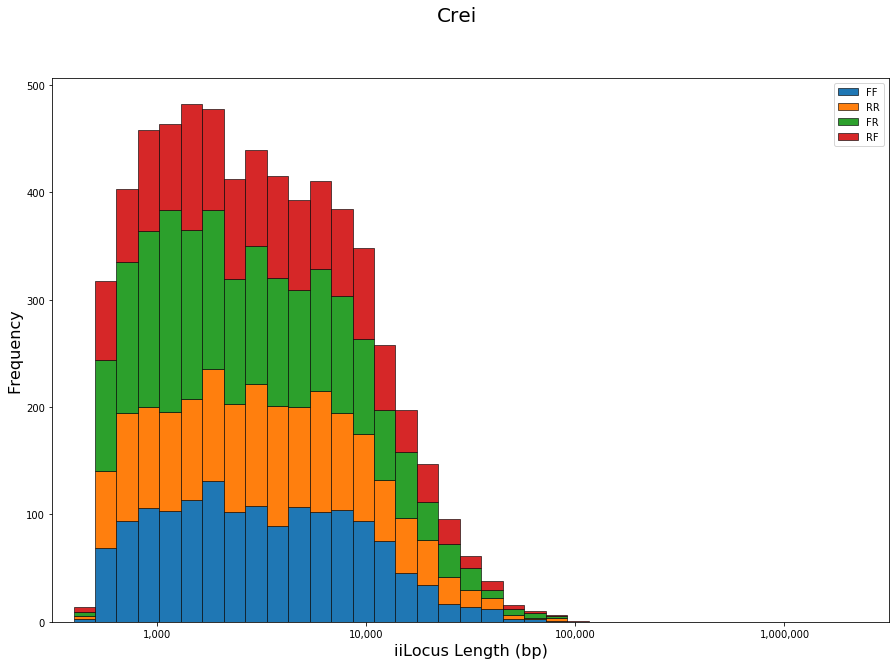

Mtru FF 574 / 2096 0.2739
Mtru RR 529 / 2096 0.2524
Mtru FR 561 / 2096 0.2677
Mtru RF 432 / 2096 0.2061


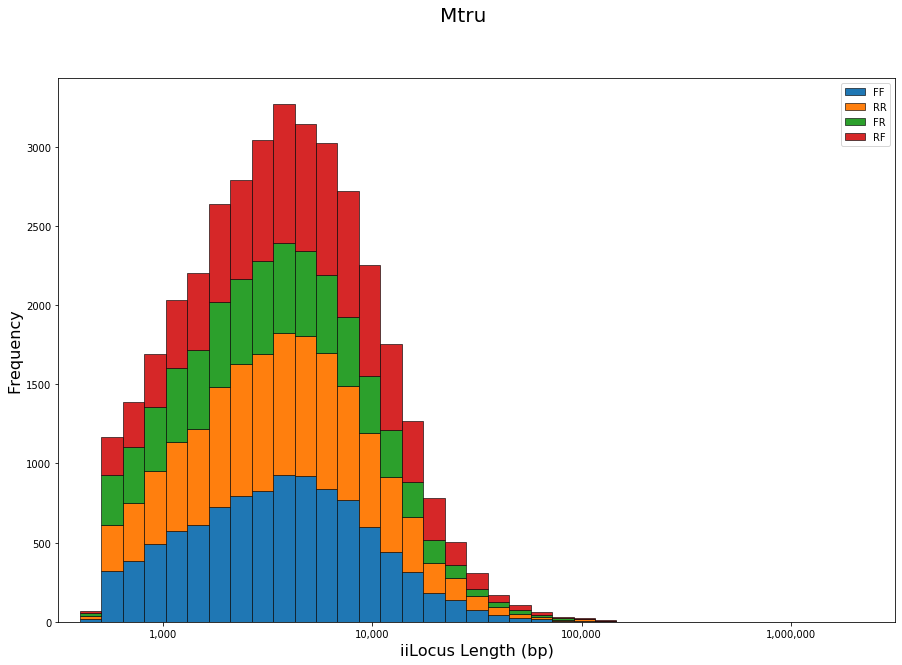

Agam FF 107 / 385 0.2779
Agam RR 96 / 385 0.2494
Agam FR 100 / 385 0.2597
Agam RF 82 / 385 0.2130


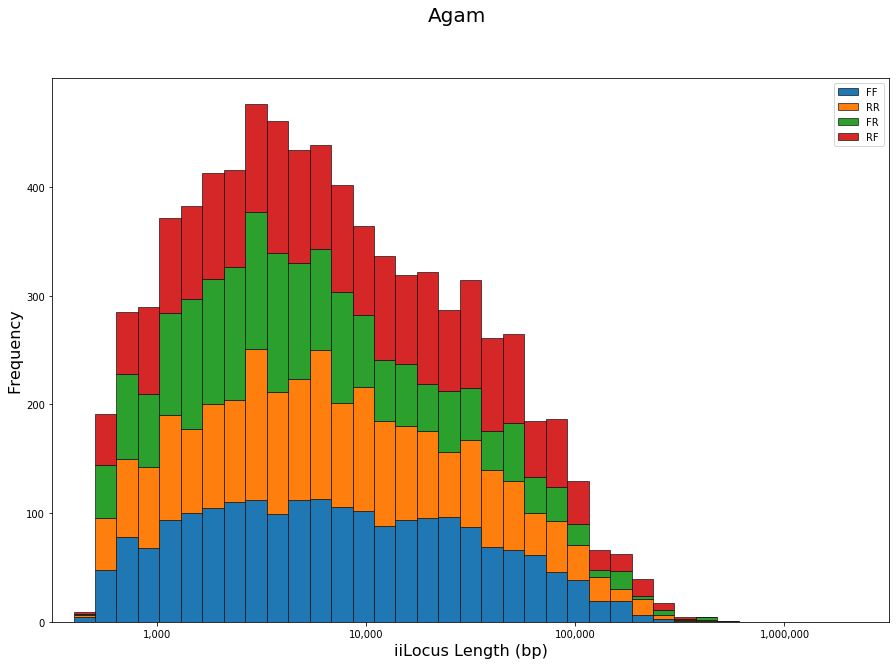

Dmel FF 74 / 246 0.3008
Dmel RR 58 / 246 0.2358
Dmel FR 47 / 246 0.1911
Dmel RF 67 / 246 0.2724


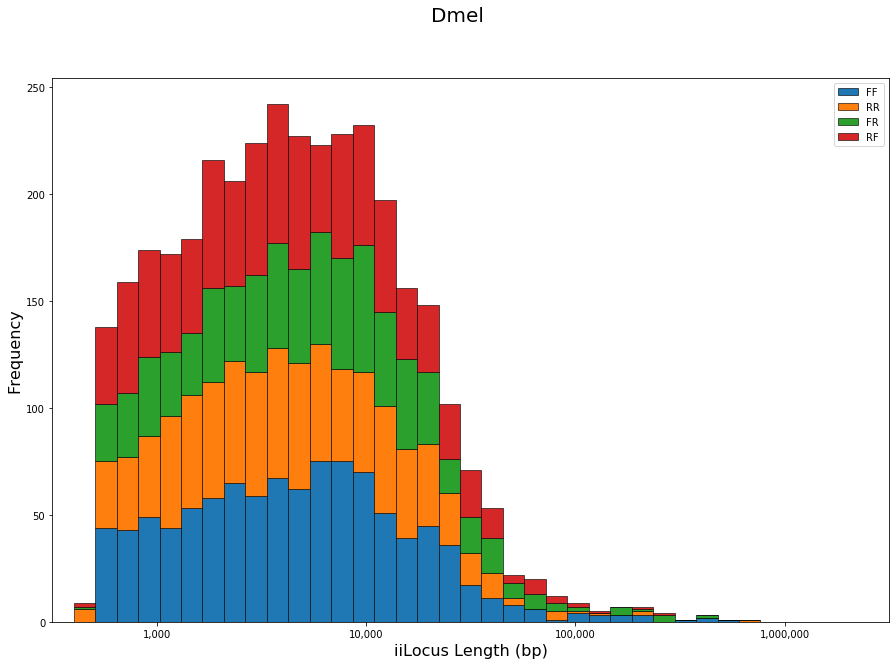

Xtro FF 60 / 323 0.1858
Xtro RR 92 / 323 0.2848
Xtro FR 130 / 323 0.4025
Xtro RF 41 / 323 0.1269


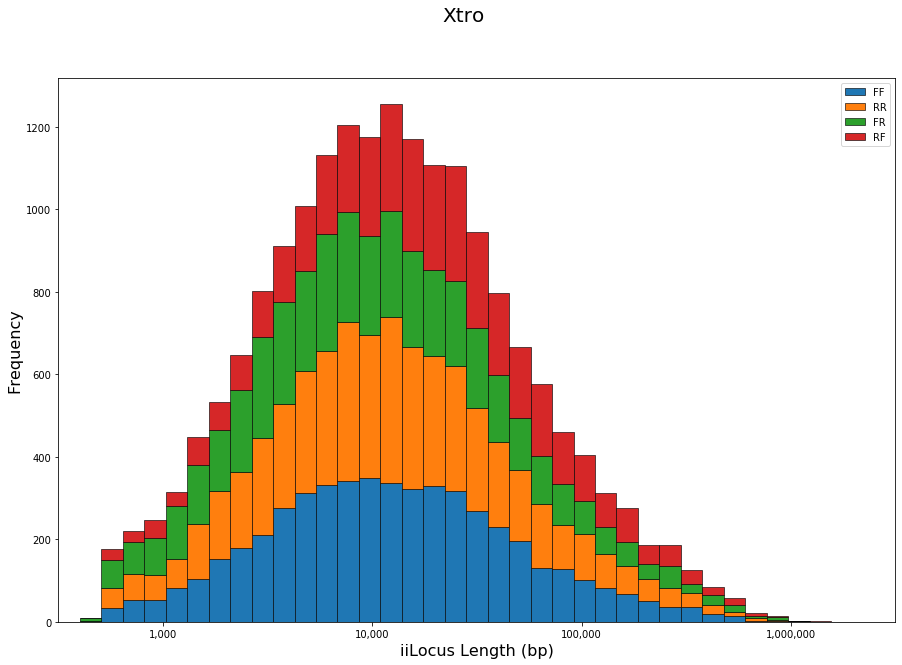

Drer FF 277 / 895 0.3095
Drer RR 269 / 895 0.3006
Drer FR 181 / 895 0.2022
Drer RF 168 / 895 0.1877


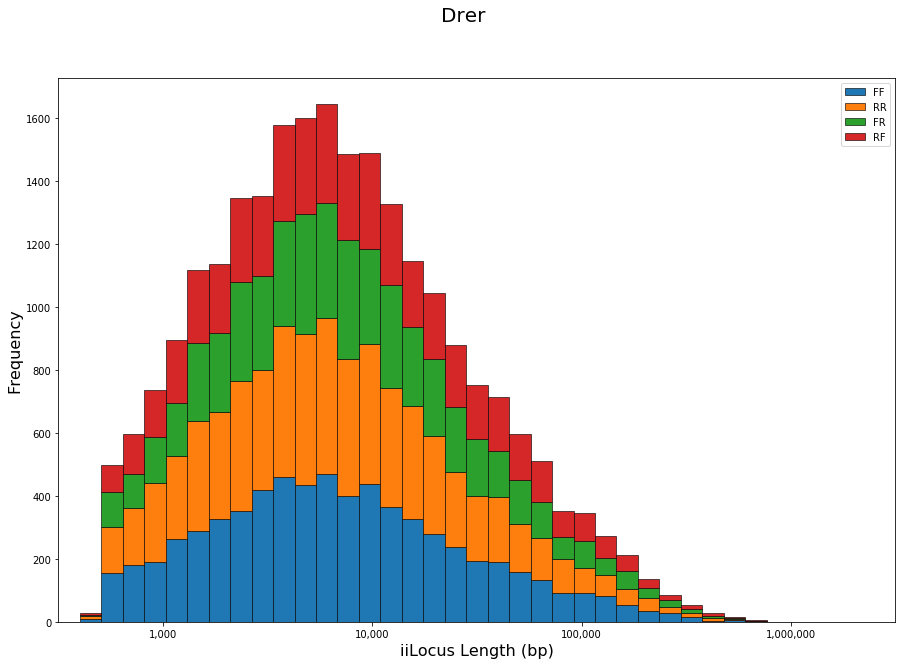

Mmus FF 85 / 370 0.2297
Mmus RR 108 / 370 0.2919
Mmus FR 127 / 370 0.3432
Mmus RF 50 / 370 0.1351


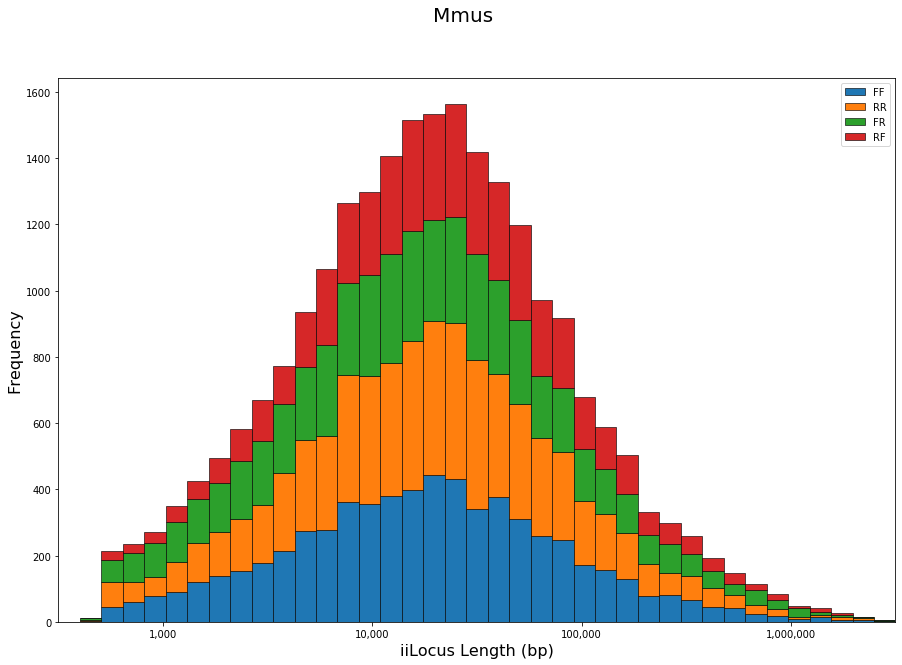

Hsap FF 97 / 336 0.2887
Hsap RR 86 / 336 0.2560
Hsap FR 88 / 336 0.2619
Hsap RF 65 / 336 0.1935


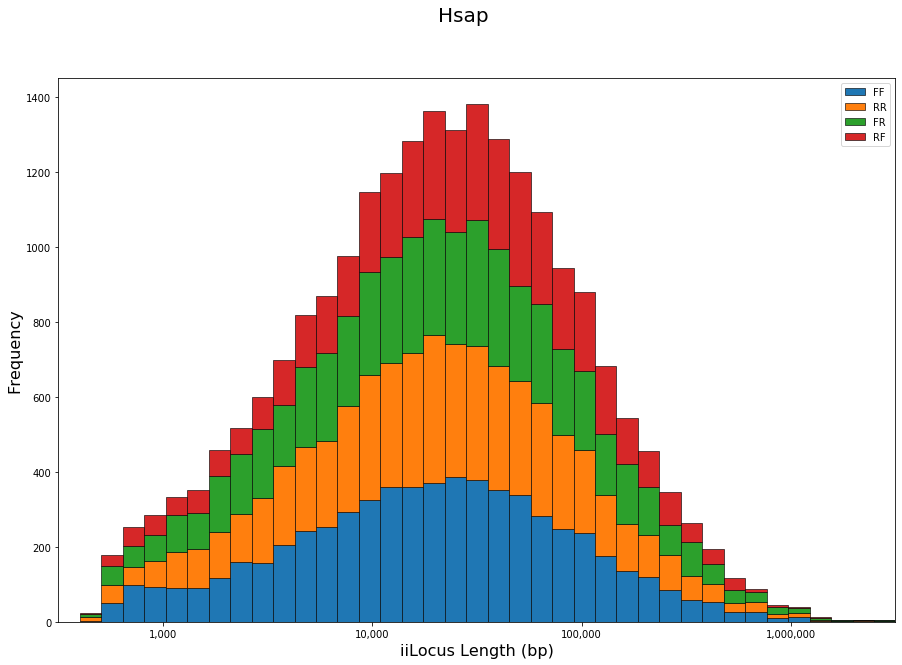

In [8]:
orientations = ['FF', 'RR', 'FR', 'RF']
for species in ['Scer', 'Cele', 'Crei', 'Mtru', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']:
    datafile = 'species/{}/{}.iloci.tsv'.format(species, species)
    shuffile = 'species/{}/{}.iloci.shuffled.tsv'.format(species, species)
    data = pandas.read_table(datafile)
    data['LogLength'] = numpy.log10(data['Length'])
    shufdata = pandas.read_table(shuffile)
    shufdata['LogLength'] = numpy.log10(shufdata['Length'])
    
    iiloci = data.loc[data.LocusClass == 'iiLocus']
    short = iiloci.loc[iiloci.Length < 750]
    shufiiloci = shufdata.loc[shufdata.LocusClass == 'iiLocus']
    #print(shufiiloci.head())
    subsets = list()
    shufsubsets = list()
    for orient in orientations:
        # subset = iiloci.loc[(iiloci.FlankGeneOrient == orient) & (iiloci.Length > 10000)]
        subset = iiloci.loc[(iiloci.FlankGeneOrient == orient)]
        subsets.append(subset['LogLength'])
        shortsubset = short.loc[short.FlankGeneOrient == orient]
        print(species, orient, '{} / {}'.format(len(shortsubset), len(short)), '{:.4f}'.format(len(shortsubset) / len(short)))
        shufsubset = shufiiloci.loc[(shufiiloci.FlankGeneOrient == orient)]
        shufsubsets.append(shufsubset['LogLength'])

    fig, axis = plt.subplots()
    #_ = plt.subplot(121)
    _ = plt.hist(subsets, stacked=True, bins=numpy.log10(numpy.logspace(2.5, 6.5, 40)), label=orientations, edgecolor='black', linewidth=0.6)
    #_ = plt.title('Observed')
    _ = plt.legend()
    #_ = plt.subplot(122)
    #_ = plt.hist(shufsubsets, stacked=True, bins=20, label=orientations)
    #_ = plt.title('Shuffled')
    #_ = plt.legend()
    _ = axis.set_xlabel('iiLocus Length (bp)', fontsize=16)
    _ = axis.set_ylabel('Frequency', fontsize=16)
    _ = axis.set_xlim((2.5, 6.5))
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])
    _ = plt.suptitle(species, fontsize=20)
    _ = plt.show()

In [7]:
numpy.logspace(2.5, 6.5, 25)

array([  3.16227766e+02,   4.64158883e+02,   6.81292069e+02,
         1.00000000e+03,   1.46779927e+03,   2.15443469e+03,
         3.16227766e+03,   4.64158883e+03,   6.81292069e+03,
         1.00000000e+04,   1.46779927e+04,   2.15443469e+04,
         3.16227766e+04,   4.64158883e+04,   6.81292069e+04,
         1.00000000e+05,   1.46779927e+05,   2.15443469e+05,
         3.16227766e+05,   4.64158883e+05,   6.81292069e+05,
         1.00000000e+06,   1.46779927e+06,   2.15443469e+06,
         3.16227766e+06])